<a href="https://colab.research.google.com/github/axel-sirota/normalise-data-pandas/blob/main/module4/NormaliseDataPandas_Mod4Demo1_NormalizerScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply Normalizers scaling on Pandas

## Prep

To start things, let's download the same dataset as before, and here we will compare the standard scaler with the normalisers

In [1]:
%%writefile get_data.sh
if [ ! -f data.csv ]; then
  wget -O data.csv https://raw.githubusercontent.com/axel-sirota/normalise-data-pandas/main/data/data.csv
fi

Overwriting get_data.sh


In [2]:
!bash get_data.sh

In [3]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline

data = pd.read_csv('data.csv')
data

,uniform_negative,uniform_positive,normal
0,-3.776188,6.666627,3.253714
1,-4.856584,3.437850,2.436924
2,-3.444649,3.844239,5.644002
3,-4.716353,7.082680,2.388518
4,-4.179619,3.576941,6.439704
...,...,...,...
4995,-3.475292,11.878456,6.403464
4996,-3.000431,10.887165,4.765301
4997,-1.430485,9.745799,4.457029
4998,-2.616039,3.713145,4.751464


Let's remember we had 3 features with three different distributions, two uniforms and one normal.

In [4]:
data.describe()

,uniform_negative,uniform_positive,normal
count,5000.000000,5000.000000,5000.000000
mean,-2.990926,7.992664,4.992618
std,1.139189,2.882320,2.024932
min,-4.998775,3.000098,-1.686932
25%,-3.966516,5.490951,3.629852
50%,-2.947714,7.964376,5.026905
75%,-2.021868,10.471890,6.370167
max,-1.001237,12.994690,11.536840


## Normalising: 4-step guide

To put everything into the same scale, we normalise. We will create 4 dataframes, one per each norm the Normalise supports, as well as one for the Standard Scaler

### Step 1: Import

In [5]:
from sklearn.preprocessing import StandardScaler, Normalizer


### Step 2: Instantiate the Scalers

The Normaliser takes one argument which is the norm. A norm is a measure of how big a given datapoint is with respect to the rest. Let's see some examples:

<img src="https://dl.dropboxusercontent.com/s/pmsmm1098b4rsmh/L2-norm.png"/>

The **L2** norm measures the length (or norm) or the datapoint (7,5) as the **green** arrow length.

By Pythagoras this is equal to:

\begin{equation}
||x||_2 = \sqrt{x_1^2 + x_2^2} = \sqrt{5^2 + 7^2} = \sqrt{74} ≈ 8.6
\end{equation}

On another front, the **L1** norm defines the length (or norm) of the datapoint (7, 5) as the **sum** of the blue and red arrows. This means:

\begin{equation}
||x||_1 = |x_1| + |x_2| = 7+5 = 12
\end{equation}

Finally, the **max** norm defines the length of the datapoint (7,5) as the maximum between the green and blue arrows. This means:

\begin{equation}
||x||_\infty = \max\{x_1, x_2\} = \max\{7, 5\} = 7
\end{equation}

We use different norms to different uses. The most normal one is the l2 norm and it is the default, however if we suspect we have some outliers, we may use the max norm which would efectively clip any outliers to not have  avalue above certain limit.

In [6]:
scalers = [('standard', StandardScaler())] + [(f'{norm_to_use} normaliser', Normalizer(norm=norm_to_use)) for norm_to_use in ['l2', 'l1', 'max']]

### Step 3: Fit the dataset

In [7]:
for scaler in scalers:
  scaler[1].fit(data)

### Step 4: Transform the data

In [8]:
dfs = [pd.DataFrame(scaler[1].transform(data), columns=data.columns) for scaler in scalers]

Remember the output is a numpy array, so we will recreate the Pandas DataFrame from it. The only difference is we re doing it in list comprehensions. To see an example of one dataframe, the one from the scaler:

In [9]:
dfs[0]

,uniform_negative,uniform_positive,normal
0,-0.689385,-0.460105,-0.858833
1,-1.637871,-1.580418,-1.262240
2,-0.398326,-1.439410,0.321714
3,-1.514762,-0.315744,-1.286147
4,-1.043560,-1.532156,0.714705
...,...,...,...
4995,-0.425228,1.348282,0.696807
4996,-0.008345,1.004327,-0.112271
4997,1.369919,0.608298,-0.264524
4998,0.329115,-1.484897,-0.119104


## Analising the results

First we will see what does the scalers do to each feature in a boxplot

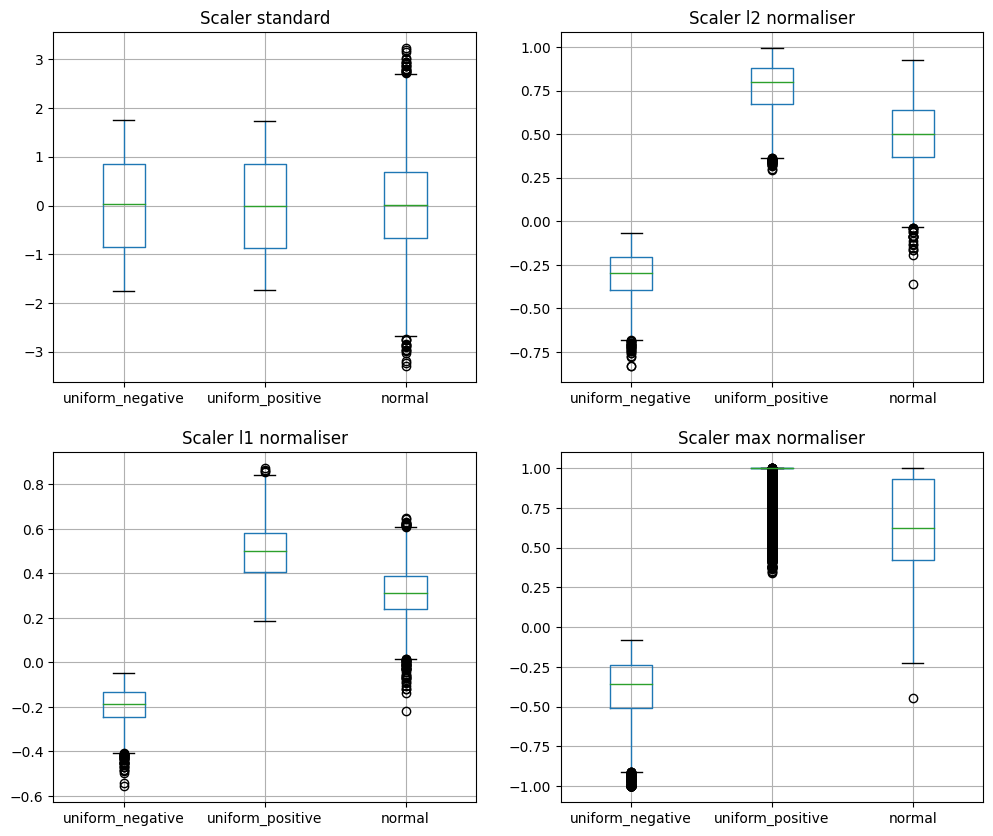

In [10]:
import matplotlib.pyplot as plt
import itertools
fig, axes = plt.subplots(2,2, figsize=(12,10))
for ix, (i, j) in enumerate(itertools.product(range(2), range(2))):
  dfs[ix].boxplot(ax=axes[i][j])
  axes[i][j].set_title(f"Scaler {scalers[ix][0]}")

As you can see, the first striking difference is that the Standard Scaler, which is often known as ZScore scaling, aligns all features to have mean 0 and variance 1, the normalisers don't do that! 

What they do is ensure each feature has length (norm) 1, by diving each datapoint by the length. That is why each boxplot of the normalisers have range -1 to 1. 

Let's see the distributions with a density plot, both from before and after

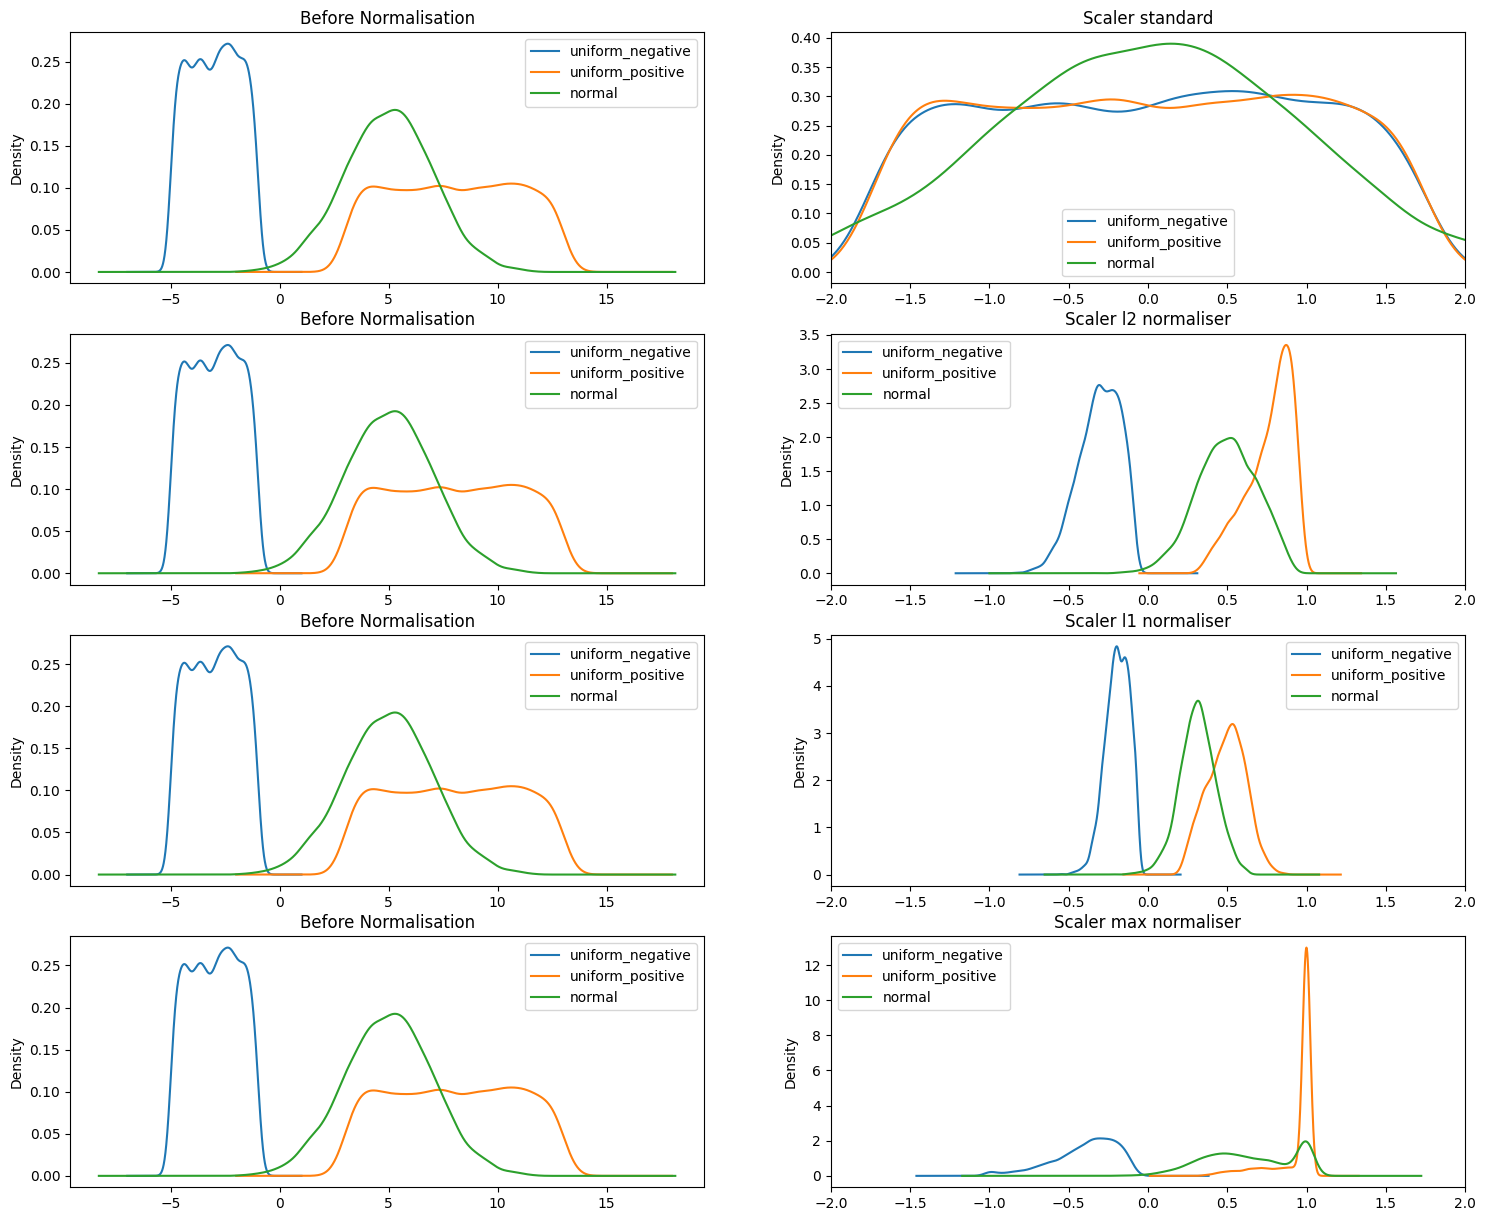

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,2, figsize=(18,15))
for ix, (i, j) in enumerate(itertools.product(range(4), range(2))):
  if j == 0:
    data.plot(ax=axes[i][0], kind='density')
    axes[i][0].set_title("Before Normalisation")
    continue
  if ix % 2 != 0:
    dfs[i].plot(ax=axes[i][j], kind='density')
    axes[i][j].set_title(f"Scaler {scalers[i][0]}")
    axes[i][j].set_xlim(-2,2)


What we can clearly see is that each normaliser has an effect of making the end feature distribution more bell shaped, ergo normal; as a matter of fact this is why they are called normalisers. The l2 normaliser respects the natural mean and variance of the input features, but the l1 normaliser, on the other hand, tries to reduce variance more, by making the bell shaped taller.

Finally, the max normaliser only affects features with values higher than 1, therefore cipping them on 1 such that the overall length, by this normaliser, is 1.

## Some interesting features of these scalers

In [12]:
new_point = pd.DataFrame(np.array([500000,500000,500000]).reshape(1, 3), columns=data.columns)
new_data = pd.concat([data, new_point], axis=0).reset_index(drop=True)

In [13]:
for scaler in scalers:
  scaler[1].fit(new_data)

In [14]:
dfs = [pd.DataFrame(scaler[1].transform(new_data), columns=data.columns) for scaler in scalers]

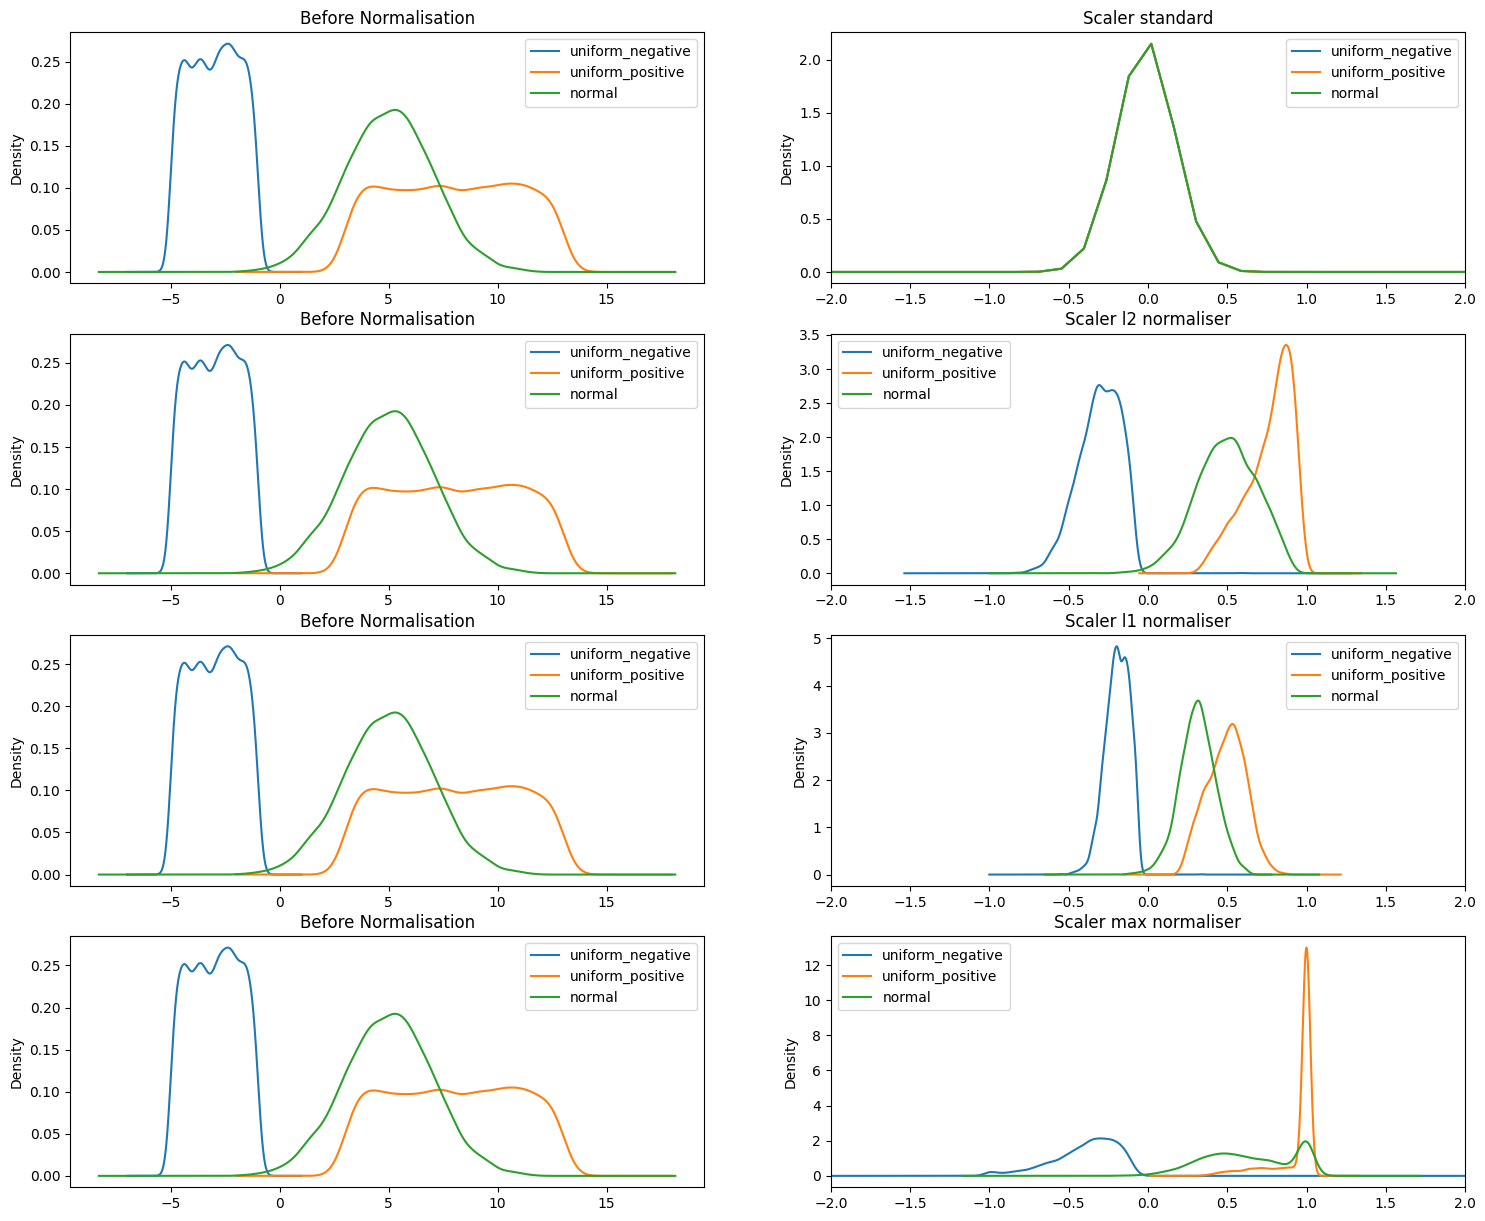

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,2, figsize=(18,15))
for ix, (i, j) in enumerate(itertools.product(range(4), range(2))):
  if j == 0:
    data.plot(ax=axes[i][0], kind='density')
    axes[i][0].set_title("Before Normalisation")
    continue
  if ix % 2 != 0:
    dfs[i].plot(ax=axes[i][j], kind='density')
    axes[i][j].set_title(f"Scaler {scalers[i][0]}")
    axes[i][j].set_xlim(-2,2)


The one feature each normaliser has, which the standard scaler does not, is the insensitivity to some outliers. Which is a great feature to have!!!